In [1]:
OFFSET = 3000
SKIP_SIZE = 28
TARGET_CHANNEL = 15

## Running your solution for every experiment

In [2]:
%%bash
mkdir -p predictions
for i in {0..9}; do
    python interactive_runner.py "train-online.h5" "experiment_$i" \
           "./baseline_solution.py" "python" "predictions/$i.txt"
done

Process is terminated.


## Read dataset

In [3]:
import h5py
import numpy as np

%matplotlib inline
import seaborn as sns

In [4]:
def read_prediction(filename):
    with open(filename, 'r') as fin:
        return np.array([float(line) for line in fin])

In [5]:
with h5py.File('train-online.h5') as train_file:
    data = {experiment_id: np.array(experiment_data) 
                for experiment_id, experiment_data in train_file.items()}

## Plot target channel vs prediction

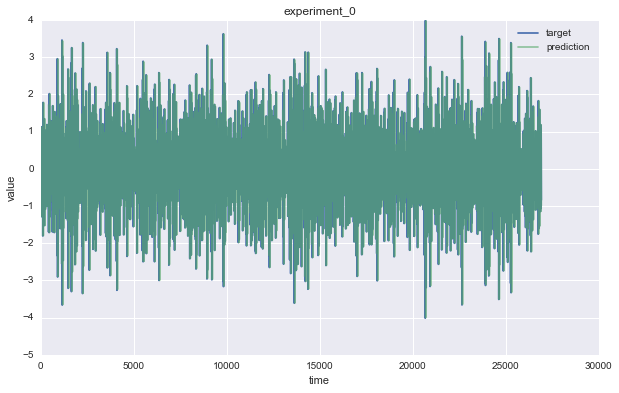

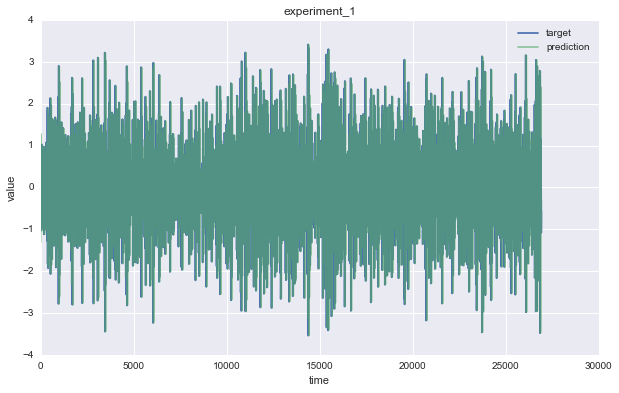

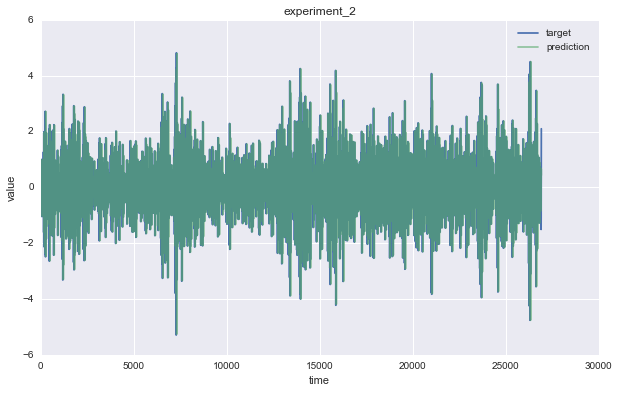

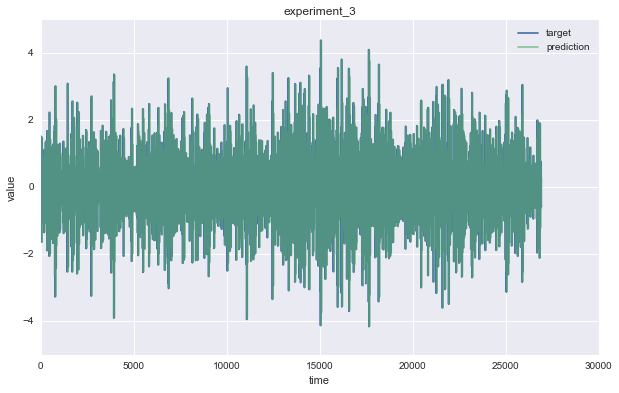

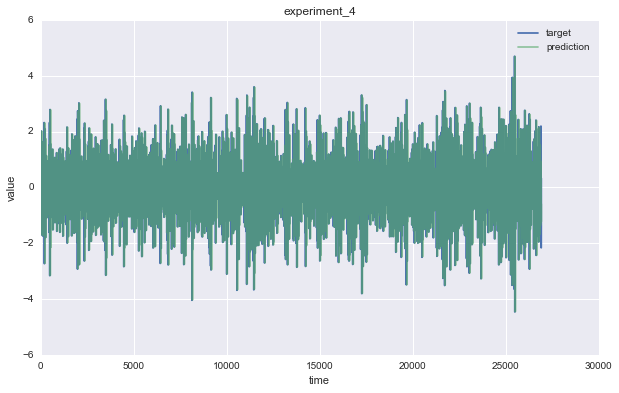

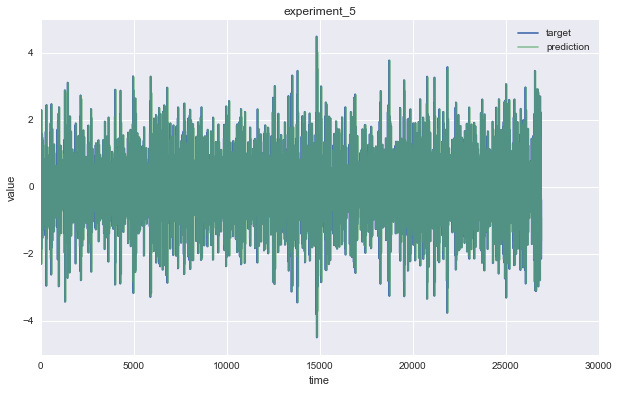

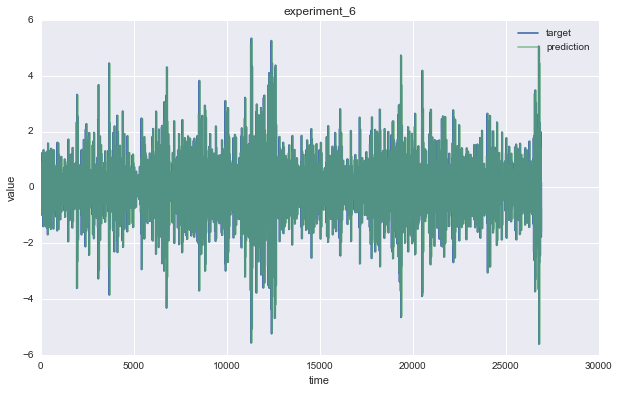

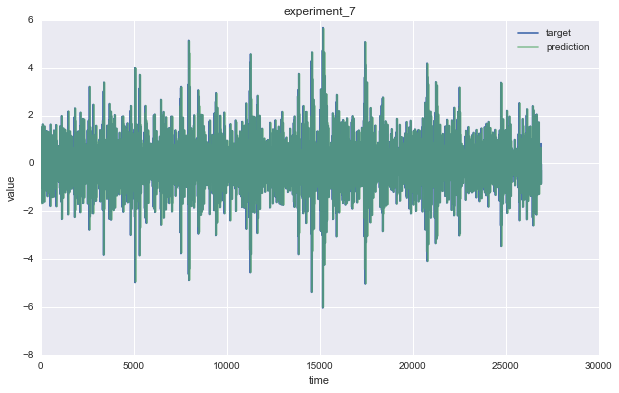

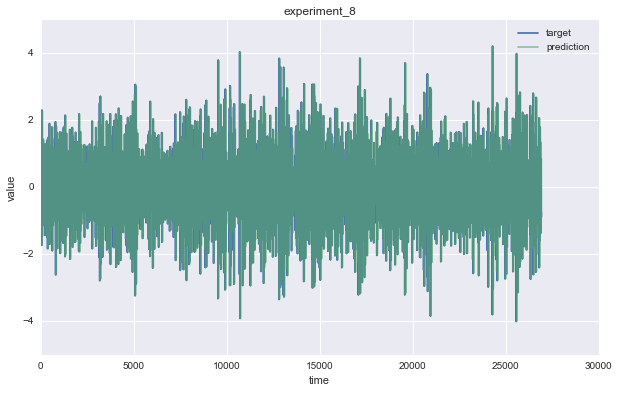

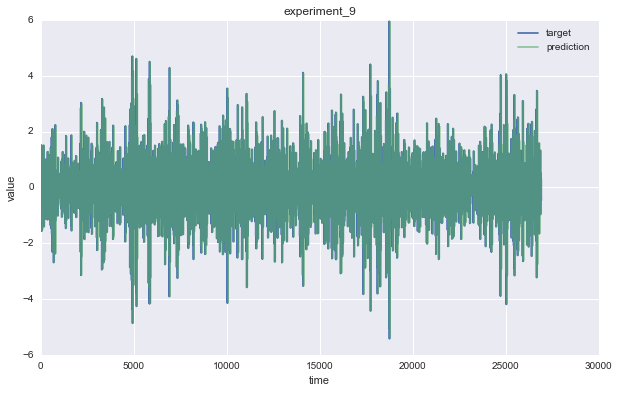

In [9]:
for i, (experiment_id, experiment_data) in enumerate(sorted(data.items())):
    target = experiment_data[OFFSET + SKIP_SIZE - 1:, TARGET_CHANNEL]
    prediction = read_prediction('predictions/{}.txt'.format(i))
    
    sns.plt.figure(figsize=(10, 6))
    sns.plt.plot(target)
    sns.plt.plot(prediction, alpha=0.6)
    sns.plt.legend(['target', 'prediction'])
    sns.plt.title(experiment_id)
    sns.plt.xlabel('time')
    sns.plt.ylabel('value')